In [1]:
import os
from pathlib import Path
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

In [2]:
file = os.getcwd() + "\\data\\ResampledDataForEDA_final.csv"
csv_data = pd.read_csv(file)
dataframe = csv_data.drop(["date"], axis=1)

In [3]:
encoder = preprocessing.LabelEncoder()
dataframe["borough"] = encoder.fit_transform(dataframe["borough"])
dataframe.head(3)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nox       35784 non-null  float64
 1   no2       35784 non-null  float64
 2   no        35784 non-null  float64
 3   o3        35784 non-null  float64
 4   pm10      35784 non-null  float64
 5   pm2.5     35784 non-null  float64
 6   ws        35784 non-null  float64
 7   wd        35784 non-null  float64
 8   air_temp  35784 non-null  float64
 9   borough   35784 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 2.6 MB


<AxesSubplot:>

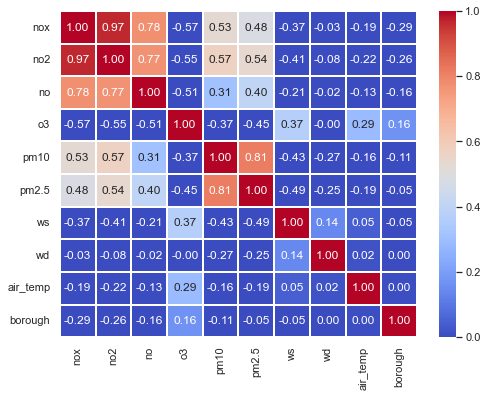

In [4]:
corr = dataframe.corr(method ='pearson')
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

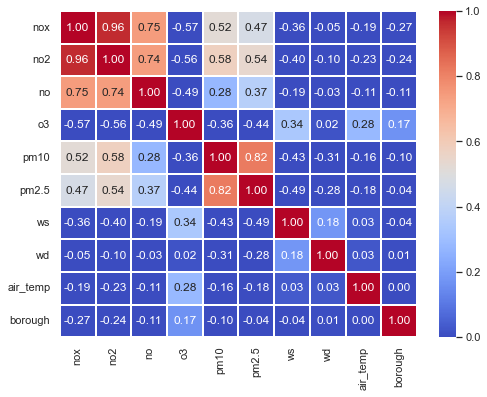

In [5]:
corr = dataframe.corr(method ='spearman')
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

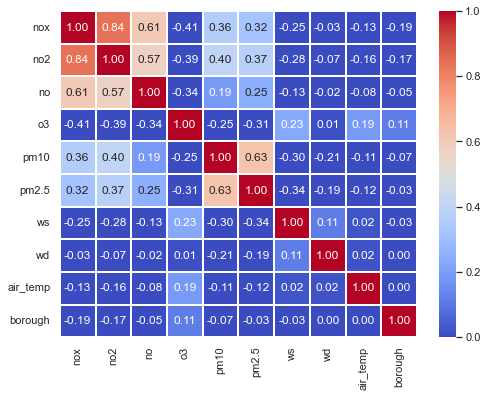

In [6]:
corr = dataframe.corr(method ='kendall')
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

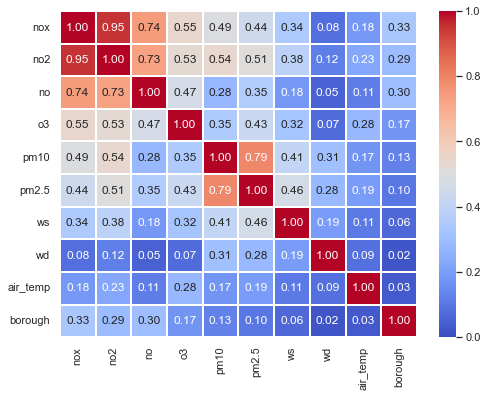

In [7]:
import dcor
data = dataframe[["nox", "no2", "no", "o3", "pm10", "pm2.5", "ws", "wd", "air_temp", "borough"]]
data = data.astype(np.float64)
cols = data.columns.values
n = len(cols)
centered = [ [0]*n for i in range(n)]
for i in range(n):
    for j in range(n):
        X = data[cols[i]]
        Y = data[cols[j]]
        centered[i][j] = dcor.distance_correlation(X, Y)

sns.heatmap(centered, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm', xticklabels=cols, yticklabels=cols)

<AxesSubplot:>

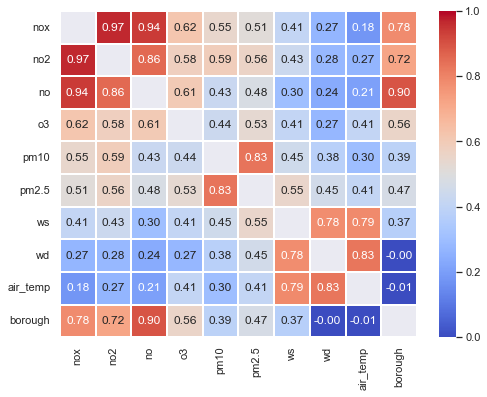

In [8]:
from ennemi import estimate_corr, pairwise_corr
pairwise = pairwise_corr(data)
sns.heatmap(pairwise, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

In [9]:
cat_col = dataframe["borough"]
enc_output = pd.get_dummies(cat_col)
df_temp = pd.concat([dataframe, enc_output], axis=1)
df_scaled = df_temp.drop(["borough"], axis=1)
cols = df_scaled.columns.values
print(cols)
df_scaled = StandardScaler().fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=cols)

print("after enc:", df_scaled.shape)
df_scaled = df_scaled.round(2)

print(df_scaled.head(5))


['nox' 'no2' 'no' 'o3' 'pm10' 'pm2.5' 'ws' 'wd' 'air_temp' 0 1 2 3 4 5 6 7
 8 9 10 11 12 13]
after enc: (35784, 23)


c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


    nox   no2    no    o3  pm10  pm2.5    ws    wd  air_temp     0  ...     4  \
0  1.47  1.50  1.53 -1.06  0.06  -0.40  0.57  1.34     -0.84  3.61  ... -0.28   
1  2.43  2.03  2.43 -1.82  1.34   1.16  0.19  0.69     -0.69  3.61  ... -0.28   
2  1.97  1.68  2.02 -1.56  1.20   0.95  0.58  1.09      0.13  3.61  ... -0.28   
3  1.52  1.42  1.61 -1.09  0.56   0.72  0.00  1.01     -0.24  3.61  ... -0.28   
4  1.81  1.55  1.91 -1.54  0.79   1.01 -0.20  0.77     -0.43  3.61  ... -0.28   

      5     6     7     8     9    10    11    12    13  
0 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28  
1 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28  
2 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28  
3 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28  
4 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28 -0.28  

[5 rows x 23 columns]


In [10]:
X = df_scaled
print(df_scaled.columns.values)
pca = PCA(0.80)
pca.fit(X)
pca.n_components_

['nox' 'no2' 'no' 'o3' 'pm10' 'pm2.5' 'ws' 'wd' 'air_temp' 0 1 2 3 4 5 6 7
 8 9 10 11 12 13]


c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


13

['nox' 'no2' 'no' 'o3' 'pm10' 'pm2.5' 'ws' 'wd' 'air_temp' 0 1 2 3 4 5 6 7
 8 9 10 11 12 13]
PCA Component count: 2


c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Explained variance ratio:  [0.20451305 0.07672225]


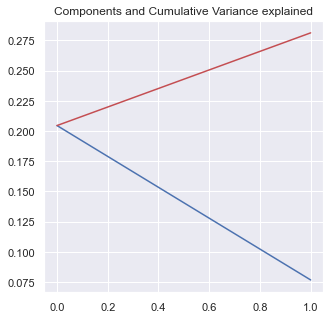

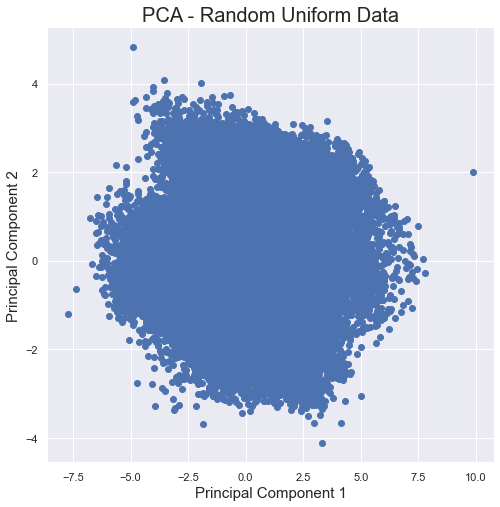

Explained variance:  [4.714460381207107, 1.7686109185681147]


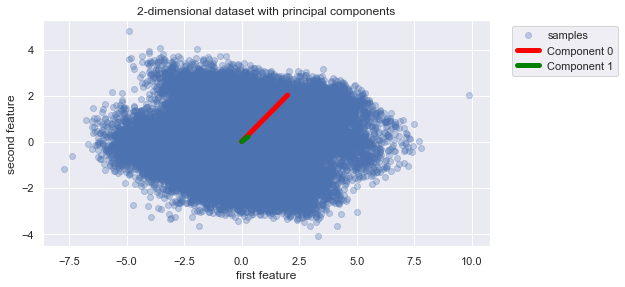

In [11]:
# PCA
X = df_scaled
print(df_scaled.columns.values)
#pca = PCA(0.95)
#pca.fit(X)
component_count = 2#pca.n_components_
print("PCA Component count:", component_count)
pca = PCA(n_components=component_count, svd_solver="full")

pca_result = pca.fit(X)
df_pca = pca.fit_transform(X.values)

print("Explained variance ratio: ", pca.explained_variance_ratio_)
fig = plt.figure(figsize=(5, 5))
plt.plot(range(2), pca.explained_variance_ratio_, c="b")
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_), c="r")
plt.title("Components and Cumulative Variance explained")
plt.show()

principalDf = pd.DataFrame(data=df_pca, columns=['principal component 1', 'principal component 2'])
finalDf = principalDf
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('PCA - Random Uniform Data', fontsize=20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'])
#ax.grid()
plt.show()

varianve = pca.explained_variance_.tolist()
print("Explained variance: ", pca.explained_variance_.tolist())
fig = plt.figure(figsize=(8, 20))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3, label="samples")
c = ["red", "green"]
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=c[i],
    )

plt.gca().set(
        aspect="equal",
        title="2-dimensional dataset with principal components",
        xlabel="first feature",
        ylabel="second feature"
    )
ax.arrow(0, 0, -varianve[0], 0, color="r", width=0.05)
ax.arrow(0, 0, 0, -varianve[1], color="b", width=0.05)
leg = plt.legend(loc = 'upper right')

ax = plt.gca()
bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())
xOffset = 0.3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

In [12]:
# BARTLETT’S TEST OF SPHERICITY
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
d = df_scaled[["nox", "no2", "no", "o3", "pm10", "pm2.5", "ws", "wd", "air_temp"]]
chi2,p = calculate_bartlett_sphericity(d)
print("Chi squared value : ",chi2)
print("p value : ", p)

Chi squared value :  230675.53998692028
p value :  0.0


In [13]:
# KAISER-MEYER-OLKIN (KMO) TEST
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(df_scaled)
print(kmo_vars)
print(kmo_model)

[0.58554758 0.73829435 0.46799778 0.71905968 0.71632547 0.68910745
 0.8077027  0.69112815 0.60408705 0.36541448 0.39192811 0.21489363
 0.35434459 0.0828073  0.08194629 0.30680664 0.28391848 0.23268326
 0.1836557  0.3016298  0.2522505  0.11560746 0.15694365]
0.4651917954060783


c:\users\user\venv\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


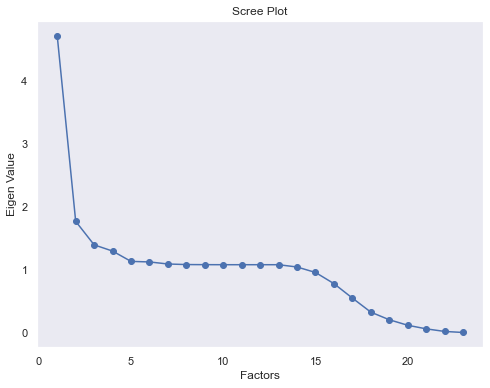

In [14]:
# DETERMINING THE NUMBER OF FACTORS
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])
fa.fit(df_scaled)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df_scaled.shape[1]+1),ev)
plt.plot(range(1,df_scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

In [15]:
# FACTOR LOADINGS
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(df_scaled)
print(pd.DataFrame(fa.loadings_,index=df_scaled.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5"]))

           Factor1   Factor2   Factor3   Factor4   Factor5
nox       0.912822  0.297928  0.160439 -0.132982 -0.244925
no2       0.884181  0.368417  0.154279 -0.112706 -0.166773
no        0.952230  0.076698 -0.076589  0.005920  0.410459
o3       -0.506235 -0.130689  0.190728  0.833398  0.016358
pm10      0.268417  0.781976  0.120529 -0.202332 -0.060741
pm2.5     0.242556  0.887451  0.050061 -0.278462  0.299370
ws       -0.194475 -0.453557 -0.088857  0.201197  0.025086
wd        0.015789 -0.301114  0.026998 -0.036702 -0.031014
air_temp -0.133313 -0.115806  0.099615  0.188931  0.053577
0         0.378906  0.027993  0.037948 -0.061200  0.042288
1        -0.240433 -0.086641  0.040026 -0.014999  0.072785
2         0.220140 -0.061146  0.028219  0.069151  0.012739
3         0.227443  0.040770  0.046802 -0.120681  0.045003
4        -0.060440  0.148491  0.099423  0.010623 -0.511755
5        -0.169560  0.015085  0.090491 -0.088704 -0.150432
6        -0.166234  0.112325  0.018457  0.098084  0.1857

In [16]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'], columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5"]))

                   Factor1   Factor2   Factor3   Factor4   Factor5
Variance          3.465176  2.061349  1.144905  1.076364  0.732641
Proportional Var  0.150660  0.089624  0.049778  0.046798  0.031854
Cumulative Var    0.150660  0.240284  0.290062  0.336861  0.368715


In [17]:
# HOPKINS STATISTIC
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from random import sample

def hopkins_statistic(X):
    X = X.values
    sample_size = int(X.shape[0]*0.05)

    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    H = u_sum/ (u_sum + w_sum)
    return H

def avg_hopkins_statistic(X):
    l = []
    for i in range(20):
        H = hopkins_statistic(X)
        l.append(H)
    h_avg = np.mean(l)
    return h_avg
print("Average Hopkins Statistics without PCA: ", avg_hopkins_statistic(df_scaled))
print("Average Hopkins Statistics with PCA: ", avg_hopkins_statistic(pd.DataFrame(df_pca)))

Average Hopkins Statistics without PCA:  0.9337870007027208
Average Hopkins Statistics with PCA:  0.9674229447853617


c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


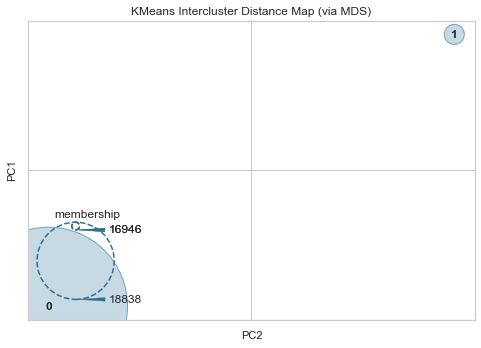

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

km = KMeans(init="k-means++", n_clusters=2)
visualizer = InterclusterDistance(km)

visualizer.fit(df_scaled)
visualizer.show() 

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

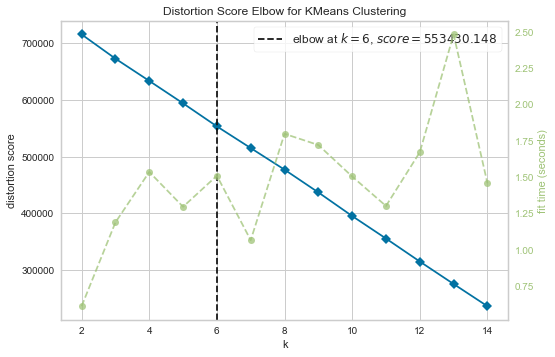

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Elbow Method for K means
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init="k-means++")
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(df_scaled)
visualizer.show()

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

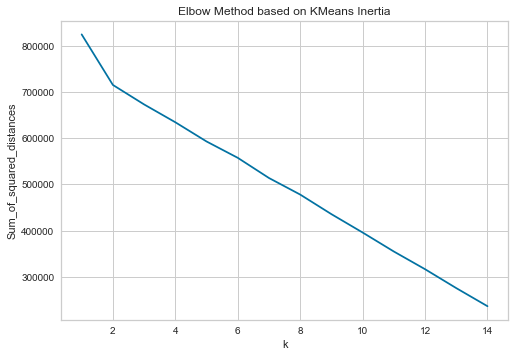

In [20]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method based on KMeans Inertia')
plt.show()

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

14


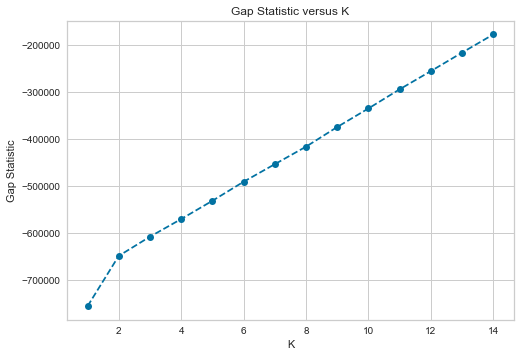

In [21]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=14):
    """
    Calculates KMeans optimal K using Gap Statistic
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)

            km = KMeans(init="k-means++", n_clusters=k)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(init="k-means++", n_clusters=k)
        km.fit(data)

        origDisp = km.inertia_
        gap = np.mean(refDisps) - origDisp
        gaps[gap_index] = gap

        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return gaps.argmax() + 1, resultsdf

score_g, df = optimalK(df_scaled, nrefs=5, maxClusters=15)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic versus K');
print(score_g)

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

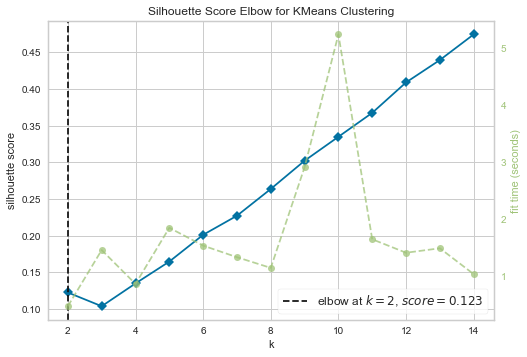

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
# Silhouette Score for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init="k-means++")
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(df_scaled)
visualizer.show()

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names

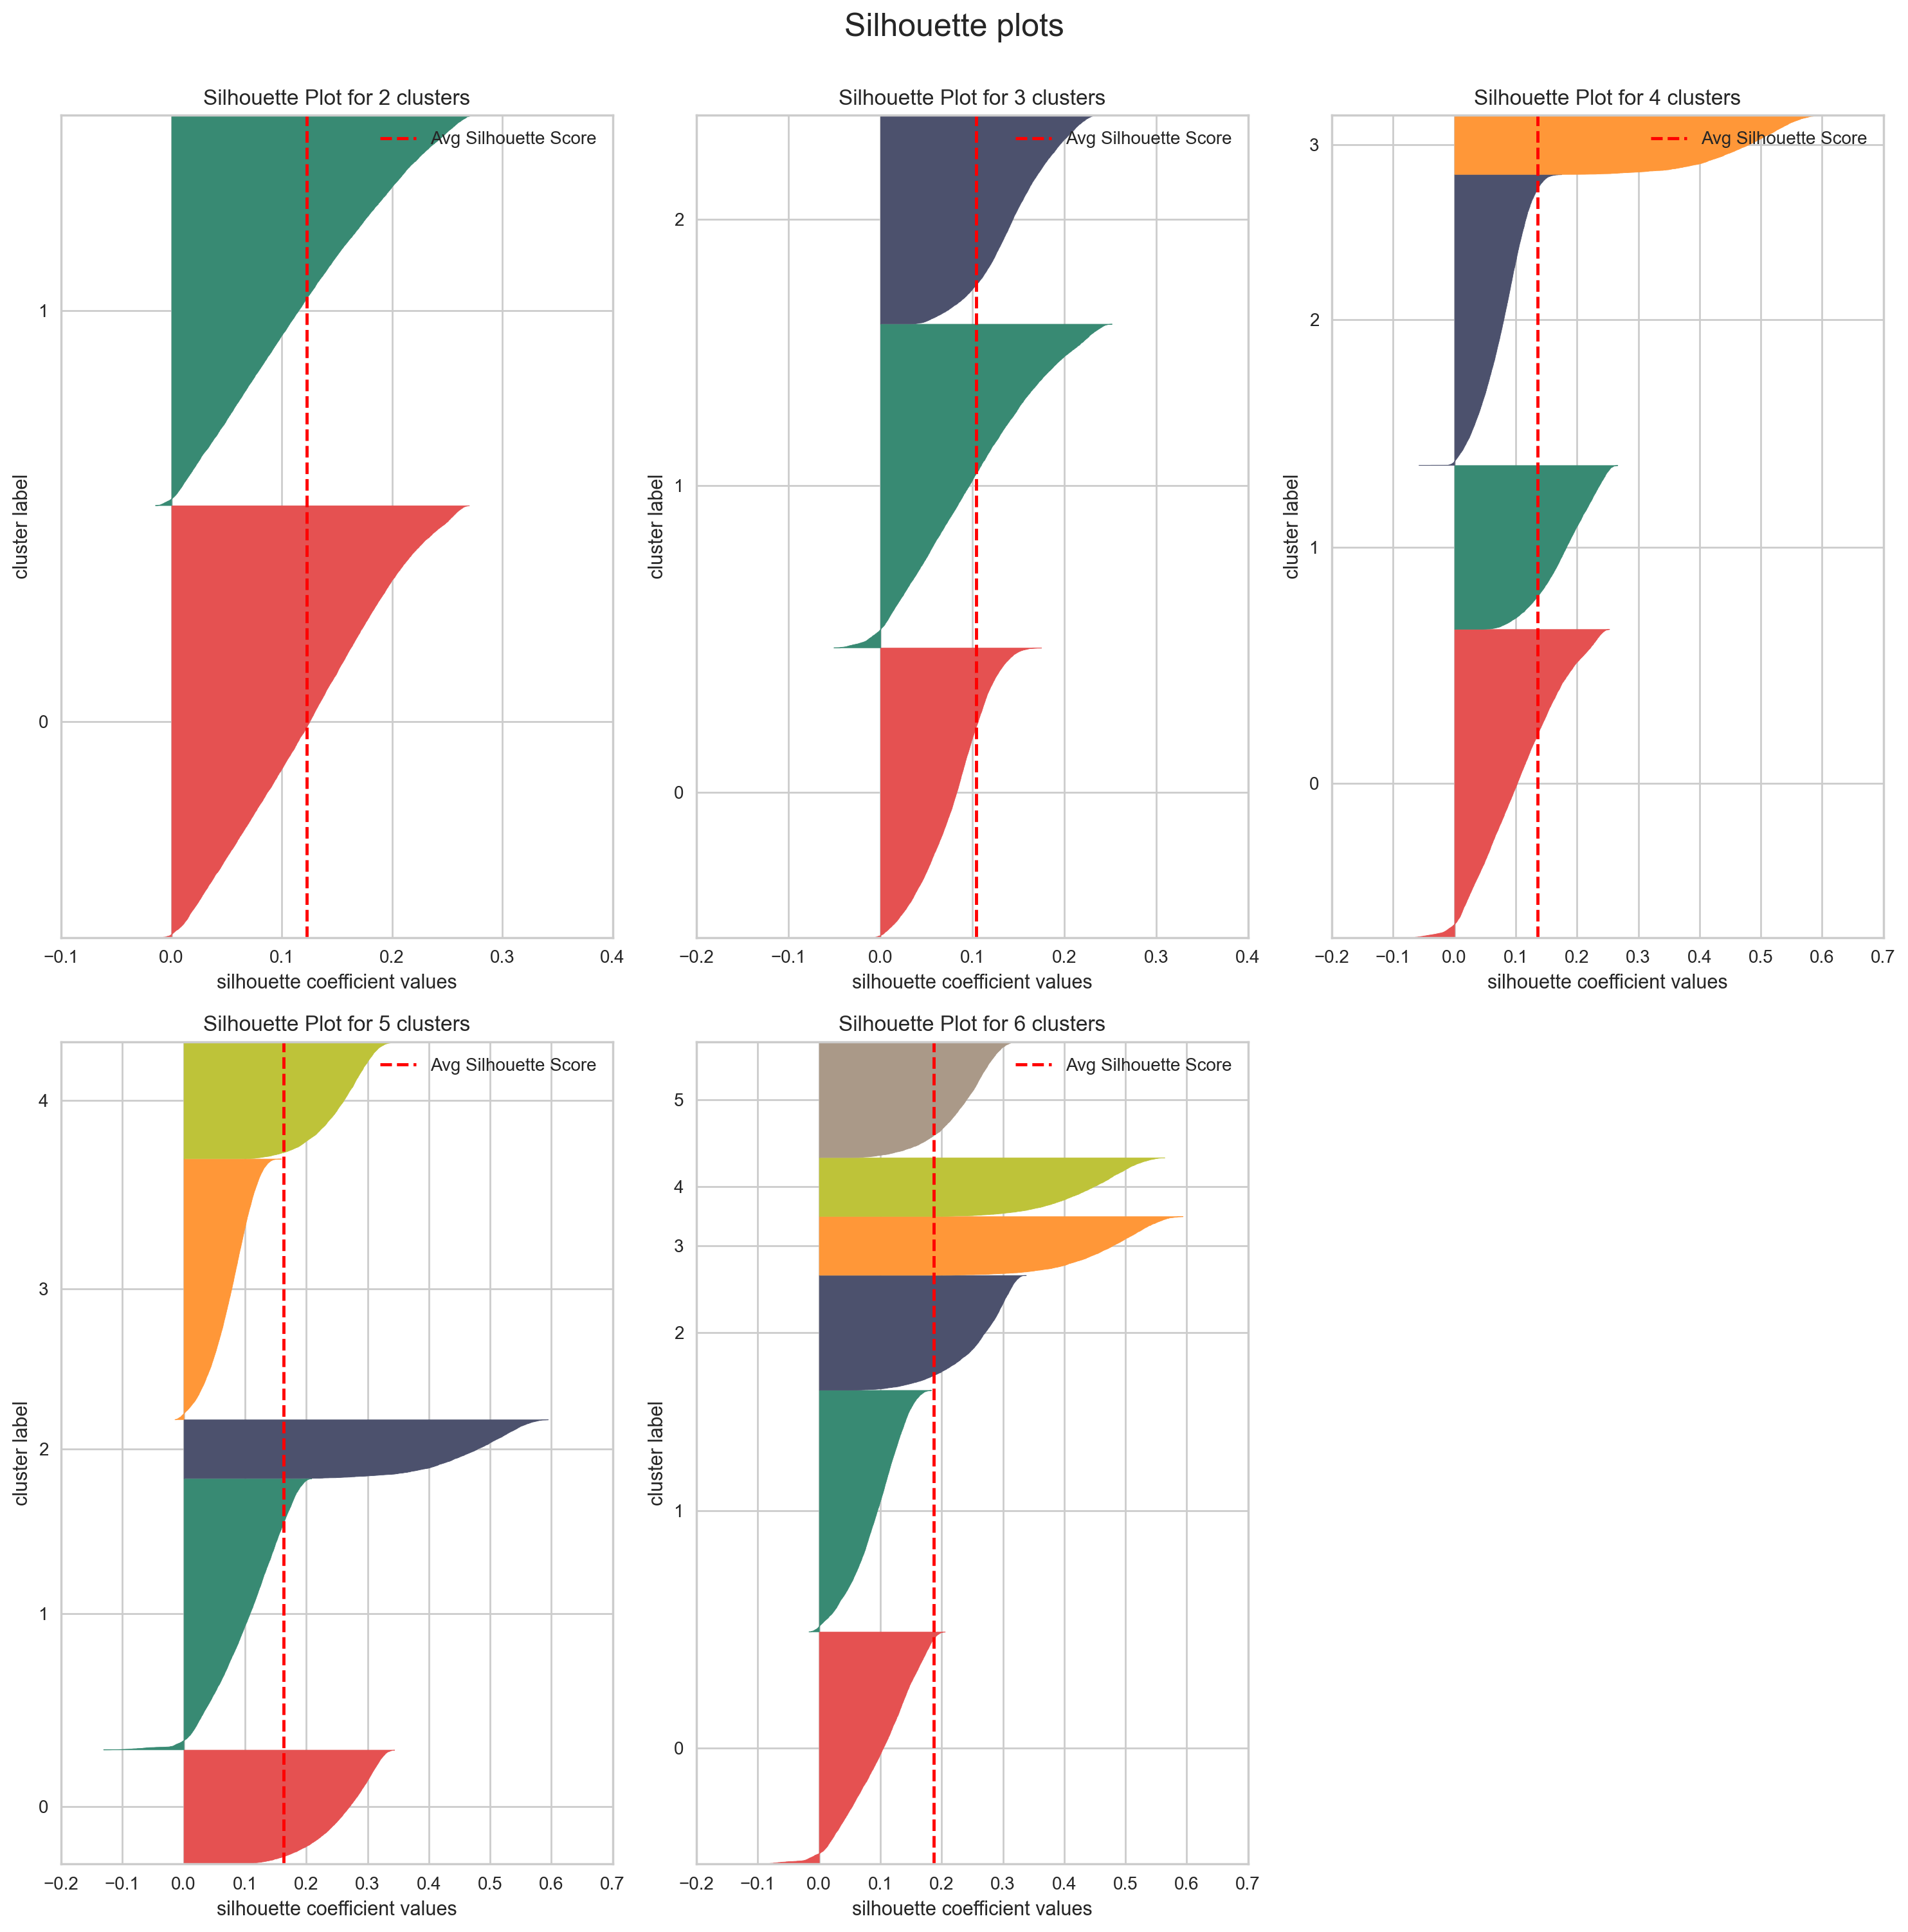

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.ticker as ticker

def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)

    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10


    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax


k_max = 6
ncols = 3

nrows = k_max // ncols + (k_max % ncols > 0)

fig = plt.figure(figsize=(15,15), dpi=200)


for k in range(2,k_max+1):

    km = KMeans(n_clusters=k,
                max_iter=300,
                tol=1e-04,
                init='k-means++',
                n_init=10,
                random_state=42,
                algorithm='auto')

    km_fit = km.fit(df_scaled)

    ax = plt.subplot(nrows, ncols, k-1)
    cluster_colors = ["#e55151", "#388a73", "#4c516d", "#ff9738", "#bec339", "#aa9988"]
    silhouette_plot(df_scaled, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()


c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

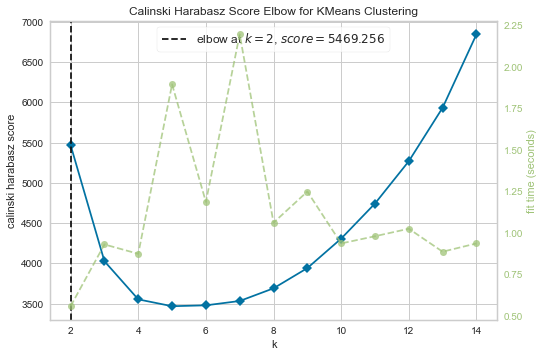

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [24]:
# Calinski Harabasz Score for K means
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init="k-means++")
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(df_scaled)
visualizer.show()

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

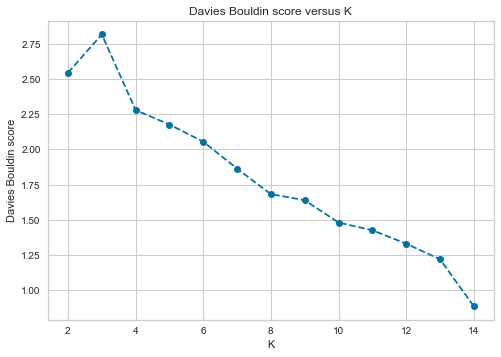

In [25]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    kmeans = KMeans(init="k-means++", n_clusters=center)
    model = kmeans.fit_predict(df_scaled)
    score = davies_bouldin_score(df_scaled, model)
    return score

scores = []
centers = list(range(2,15))
for center in centers:
    scores.append(get_kmeans_score(df_scaled, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score versus K');

In [26]:
# BIC for GMM- Lower BIC for better model
from sklearn.mixture import GaussianMixture
n_components = range(2, 15)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(df_scaled)
        score.append((cov,n_comp,gmm.bic(df_scaled)))
print(score)

c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\user\venv\lib\site-packages\sklearn\utils\v

[('spherical', 2, 2265286.306377466), ('spherical', 3, 2248324.9160770704), ('spherical', 4, 2214625.602783342), ('spherical', 5, 2117271.8092697905), ('spherical', 6, 2105058.5436804416), ('spherical', 7, 2077921.216041899), ('spherical', 8, 1962402.75513005), ('spherical', 9, 1921022.572886514), ('spherical', 10, 1781034.8177919989), ('spherical', 11, 1741510.156541527), ('spherical', 12, 1661572.5396443827), ('spherical', 13, 1587196.0607381023), ('spherical', 14, 1556867.973289492), ('tied', 2, 996672.4121934792), ('tied', 3, 488420.4127075903), ('tied', 4, -25181.275829994003), ('tied', 5, -544050.8455352021), ('tied', 6, -1063949.742631337), ('tied', 7, -1585140.2966573776), ('tied', 8, -2108067.8986134133), ('tied', 9, -2630995.5005916064), ('tied', 10, -3156597.947591748), ('tied', 11, -3682200.3940255656), ('tied', 12, -4205127.995684271), ('tied', 13, -4730730.442480477), ('tied', 14, -5256332.88901995), ('diag', 2, -1149388.4612331341), ('diag', 3, -1570272.245702721), ('dia

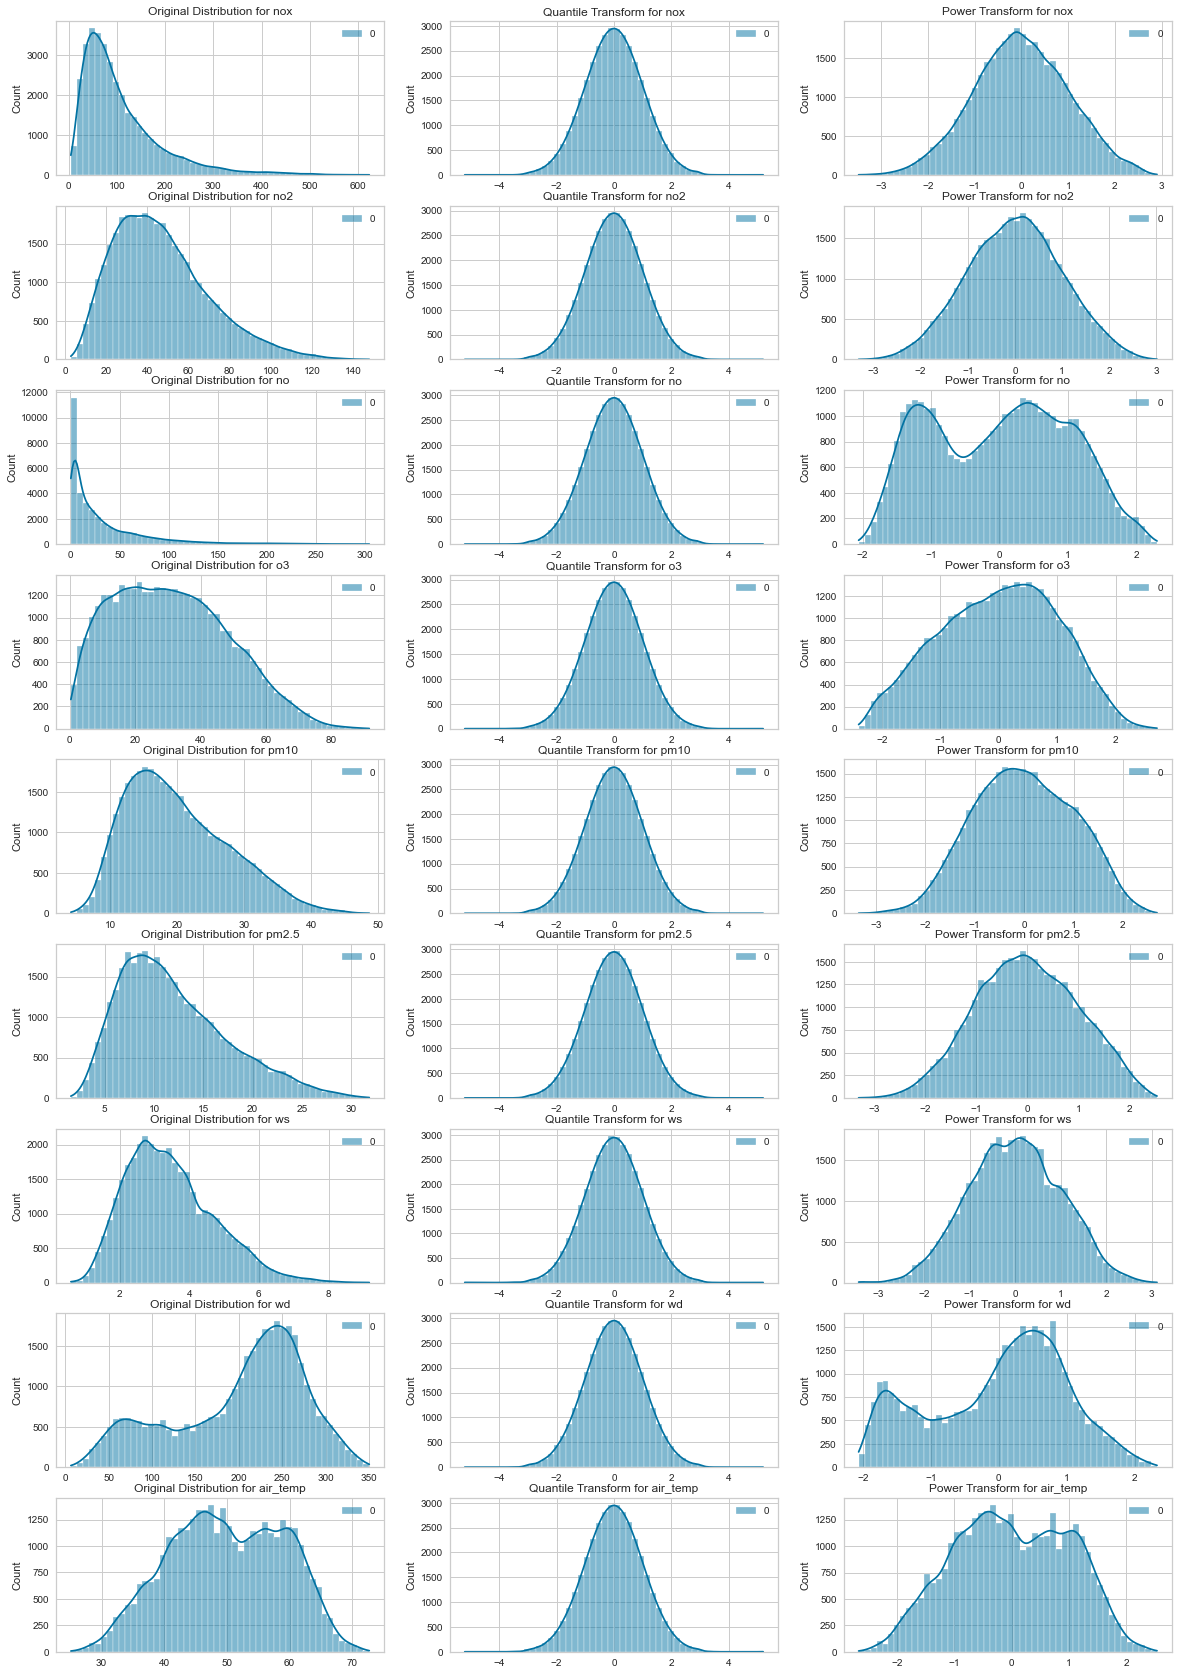

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    n = len(df.columns)
    for i in df.columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(n,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(n,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(n,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3

file = os.getcwd() + "\\data\\ResampledDataForEDA.csv"
csv_data = pd.read_csv(file)
df = csv_data.drop(["date", "borough"], axis=1)
test_transformers(df)